# Introduction

The purpose of this notebook is to serve as a simple run of ordinary least squares (OLS) on the Tecator data set. There will be a few main parts to this analysis:

1. OLS performed on the entire 215-sample data set
2. OLS performed on two distinct splits of the data, and evidence this is insufficient
3. OLS performed using 10-fold cross-validation

We offload the computation to `scripts/01_ols.py` and `src/models.py` and only pull in plots and results in this notebook.

## Imports

In [ ]:
from IPython.display import Image
import os
from pathlib import Path
import pickle



## Run the script `script/01_ols.py`

This script runs some OLS models and saves results for quick analysis. We run the procedure on the full data set, an 80/20 split using random_state 0, and an 80/20 split using random state 42.

In [2]:
%run ../scripts/01_ols.py

## Some quick holdout results

Load the results.

In [3]:
holdout_ols_names = ["ols_full", "ols_0_train", "ols_0_test", "ols_42_train", "ols_42_test"]

all_results = {}

for name in holdout_ols_names:
    with open(str((Path(os.getcwd()).parent / "data" / "01_ols" / name)), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
        all_results[name] = pickle.load(f)

### Fit plots (full data)

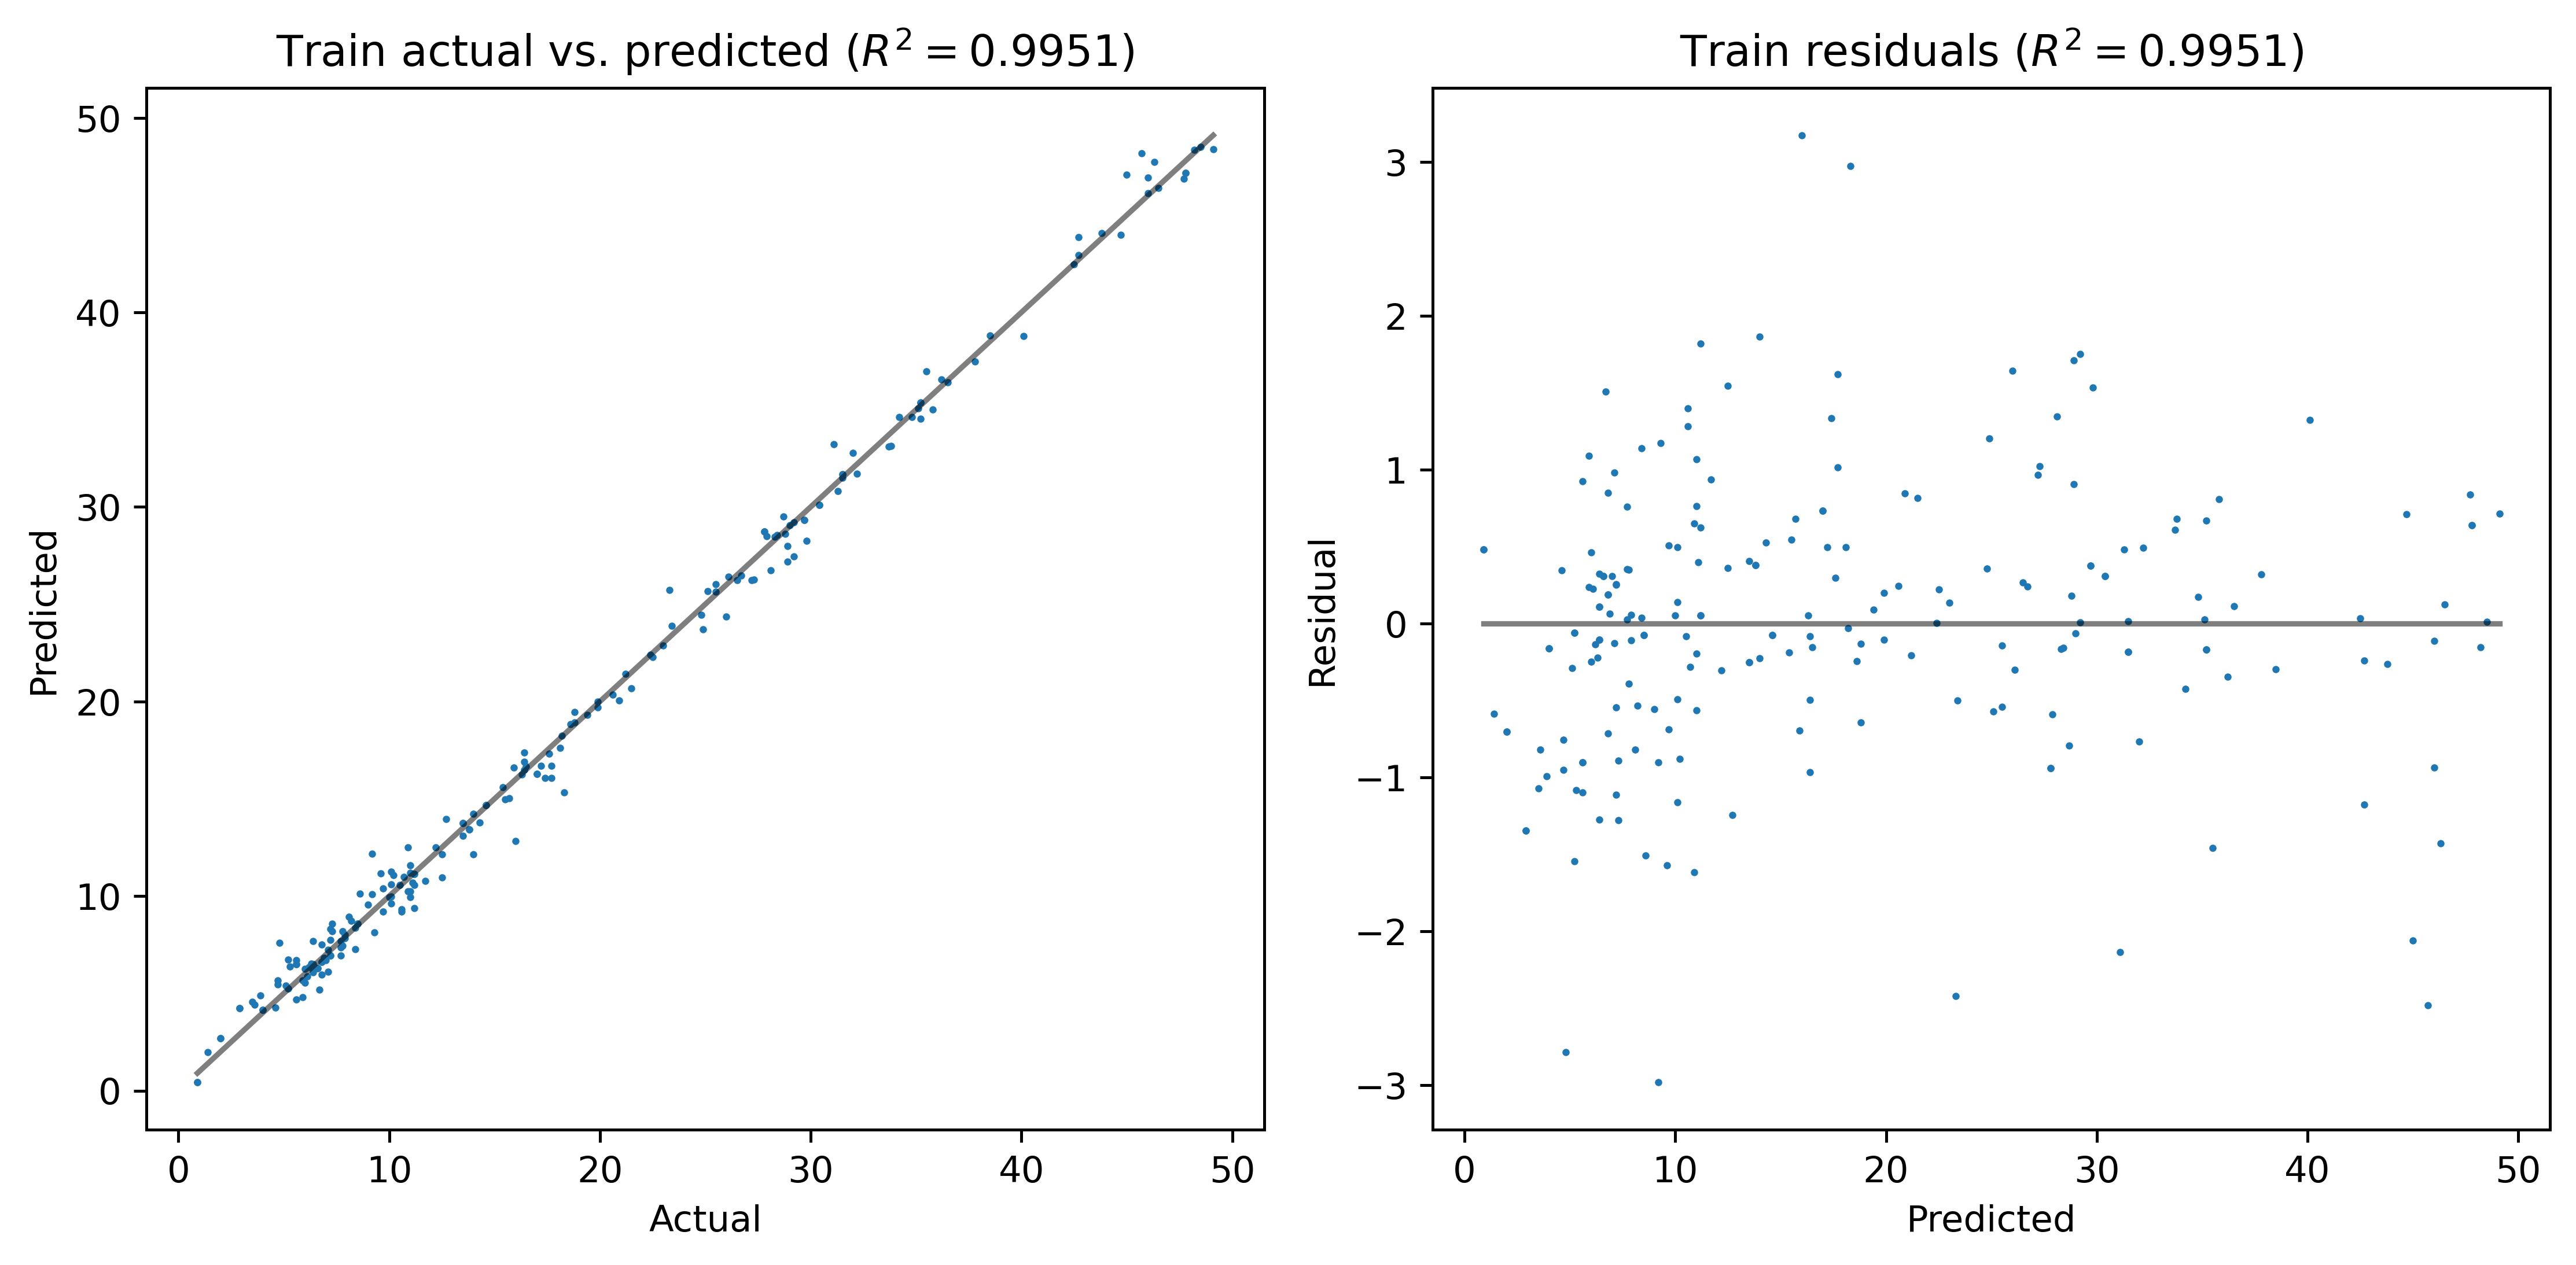

In [6]:
Image(filename="../data/01_ols/plots/ols_full.png")

There doesn't seem to be a clear pattern in the residuals, which suggests the linear model captures the behavior of the data. However, let's look at the multicollinearity of the fit.

In [7]:
print("Condition number of fit to full data:", round(all_results["ols_full"].condition_number, 2))

Condition number of fit to full data: 16167762.48


Whoa! This is absurdly large, as expected with functional data sampled on a fine grid. There's a lot of multicollinearity, so this gives us reason to attempt our other methods. However, let's examine OLS regression on a holdout set, first.

### Diagnostics (full data)

### $R^{2}$ values

We examine $R^{2}$ values for each of the three fits.

In [21]:
print("R^2 for full data:", round(all_results["ols_full"].r2_score, 4))
print()
print("Train R^2 for random state 0:", round(all_results["ols_0_train"].r2_score, 4))
print("Test R^2 for random state 0: ", round(all_results["ols_0_test"].r2_score, 4))
print()
print("Train R^2 for random state 42:", round(all_results["ols_42_train"].r2_score, 4))
print("Test R^2 for random state 42: ", round(all_results["ols_42_test"].r2_score, 4))

R^2 for full data: 0.9951

Train R^2 for random state 0: 0.9956
Test R^2 for random state 0:  0.9766

Train R^2 for random state 42: 0.9965
Test R^2 for random state 42:  0.7621


Interesting! We see that two random states have drastically different test $R^{2}$ values. Because of this, we choose to move to cross-validation.

Popular choices for cross-validation are 5-fold and 10-fold; we choose 10-fold here because computations aren't expensive for this project and 10 gives us less bias in our error estimates.

TODO: display avp and residual plots for the two holdout sets and talk about outliers. Also, plot leverage distributions and remember what to plot leverage against.